# ***Fruad Detection***

In [2]:
# Please use the attached dataset for the following activities

# 1. Use the different EDA graphs to understand how the different
#      columns influence the probability of a transaction being fraud or not.

# 2. Use the inferential statistics tool to establish the factors that
#      influence the response based on p-values.

# 3. Create a model to predict whether a transaction is fraud or not. To maintain
#      uniformity in the results, please use random_state as 30 for
#      splitting the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats import weightstats as ssw

from sklearn.model_selection import train_test_split
import statsmodels.api as sm


### Importing Necessary Libraries and Checking Data

In [4]:
df = pd.read_csv('FraudDetection.csv')

In [5]:
df.head()

,Salary,Education,Age,CreditRating,Gender,Location,Fraud
0,35795,PostGraduate,24,515,Male,Hyderabad,1
1,20860,PostGraduate,38,976,Female,Hyderabad,0
2,96820,PostGraduate,55,696,Male,Delhi,1
3,74886,PostGraduate,60,778,Female,Mumbai,1
4,26265,School,45,721,Male,Bangalore,1


In [6]:
df.shape

(10000, 7)

In [7]:
e_uni = np.unique(df.Education,return_counts=True)
e_uni

(array(['Graduate', 'PostGraduate', 'School'], dtype=object),
 array([4076, 2938, 2986]))

In [8]:
g_uni = np.unique(df.Gender,return_counts=True)
g_uni

(array(['Female', 'Male'], dtype=object), array([4946, 5054]))

In [9]:
l_uni = np.unique(df.Location,return_counts=True)
l_uni

(array(['Bangalore', 'Delhi', 'Hyderabad', 'Mumbai'], dtype=object),
 array([2454, 2555, 2483, 2508]))

In [10]:
f_uni = np.unique(df.Fraud,return_counts=True)
f_uni

(array([0, 1]), array([ 519, 9481]))

In [11]:
df.isnull().sum()

,0
Salary,0
Education,0
Age,0
CreditRating,0
Gender,0
Location,0
Fraud,0


In [12]:
df.isnull().mean()*100

,0
Salary,0.0
Education,0.0
Age,0.0
CreditRating,0.0
Gender,0.0
Location,0.0
Fraud,0.0


# EDA

## Univariate Analysis

In [13]:
df.head()

,Salary,Education,Age,CreditRating,Gender,Location,Fraud
0,35795,PostGraduate,24,515,Male,Hyderabad,1
1,20860,PostGraduate,38,976,Female,Hyderabad,0
2,96820,PostGraduate,55,696,Male,Delhi,1
3,74886,PostGraduate,60,778,Female,Mumbai,1
4,26265,School,45,721,Male,Bangalore,1


In [14]:
def bar_plot(column):
    # Show percentage
    print("Percentage distribution:")
    print(df[column].value_counts(normalize=True) * 100)
    print('-------------------------')

    # Show count
    print("\nCount distribution:")
    print(df[column].value_counts())
    print('---------------------')

    # Plot
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, hue=column, palette='Set2', legend=False)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [15]:
def histo(column,df=df, bins=30, kde=True, color='skyblue'):

    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=column, bins=bins, kde=kde, color=color)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

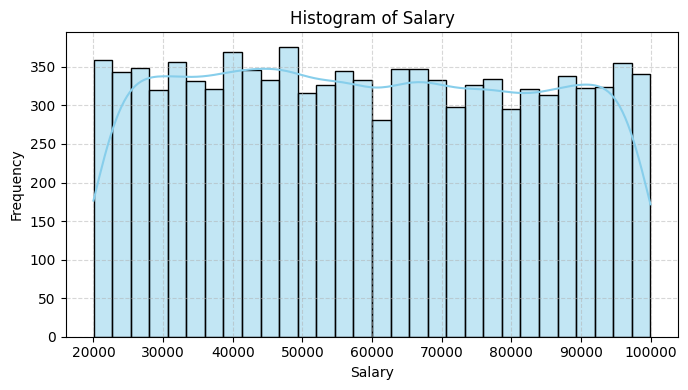

In [16]:
histo('Salary')

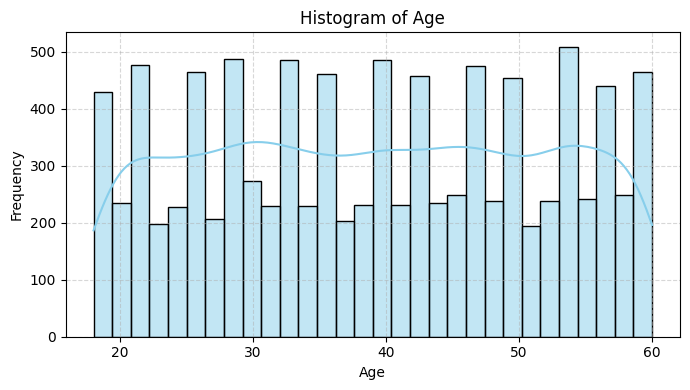

In [17]:
histo('Age')

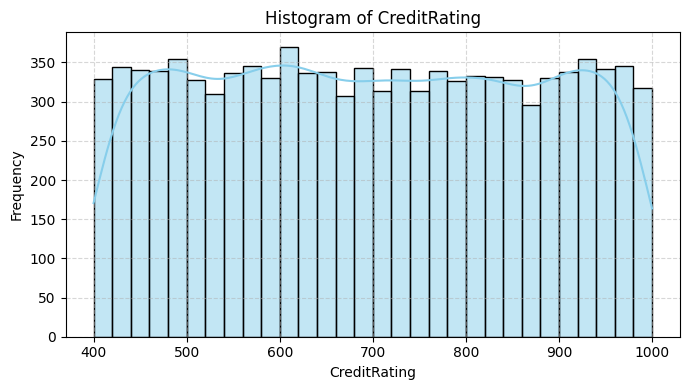

In [18]:
histo('CreditRating')

Percentage distribution:
Gender
Male      50.54
Female    49.46
Name: proportion, dtype: float64
-------------------------

Count distribution:
Gender
Male      5054
Female    4946
Name: count, dtype: int64
---------------------


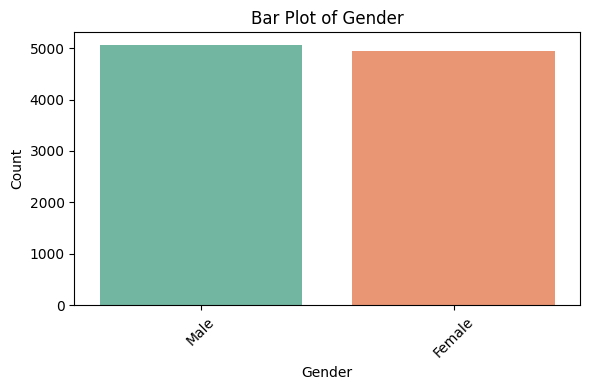

In [19]:
bar_plot('Gender')

Percentage distribution:
Location
Delhi        25.55
Mumbai       25.08
Hyderabad    24.83
Bangalore    24.54
Name: proportion, dtype: float64
-------------------------

Count distribution:
Location
Delhi        2555
Mumbai       2508
Hyderabad    2483
Bangalore    2454
Name: count, dtype: int64
---------------------


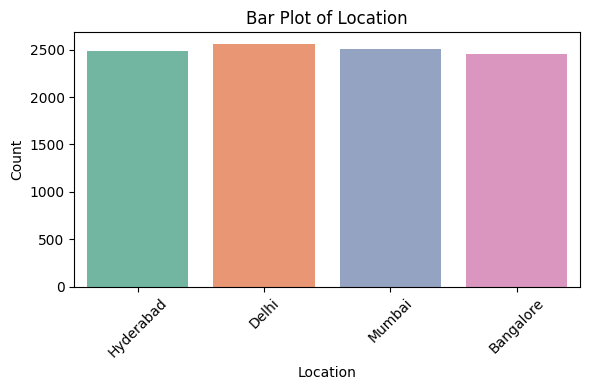

In [20]:
bar_plot('Location')

Percentage distribution:
Education
Graduate        40.76
School          29.86
PostGraduate    29.38
Name: proportion, dtype: float64
-------------------------

Count distribution:
Education
Graduate        4076
School          2986
PostGraduate    2938
Name: count, dtype: int64
---------------------


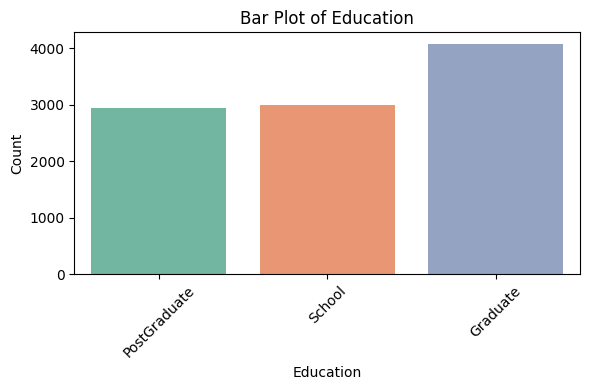

In [21]:
bar_plot('Education')

Percentage distribution:
Fraud
1    94.81
0     5.19
Name: proportion, dtype: float64
-------------------------

Count distribution:
Fraud
1    9481
0     519
Name: count, dtype: int64
---------------------


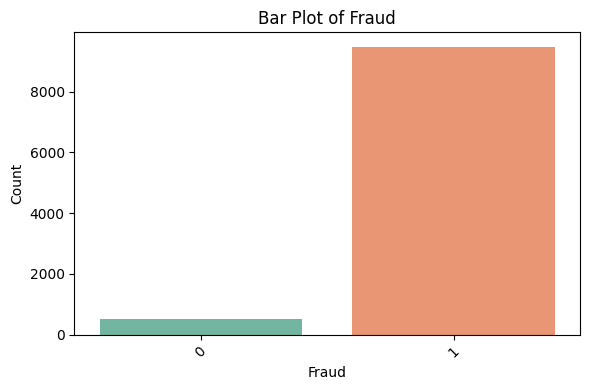

In [22]:
bar_plot('Fraud')

## Bivariate Analysis

In [23]:
df.head()

,Salary,Education,Age,CreditRating,Gender,Location,Fraud
0,35795,PostGraduate,24,515,Male,Hyderabad,1
1,20860,PostGraduate,38,976,Female,Hyderabad,0
2,96820,PostGraduate,55,696,Male,Delhi,1
3,74886,PostGraduate,60,778,Female,Mumbai,1
4,26265,School,45,721,Male,Bangalore,1


In [24]:
def boxplot(numeric_col=None,df=df, categorical_col='Fraud'):

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=categorical_col, y=numeric_col, hue=categorical_col,
                palette='Set2', legend=False)

    plt.title(f'Boxplot of {numeric_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numeric_col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

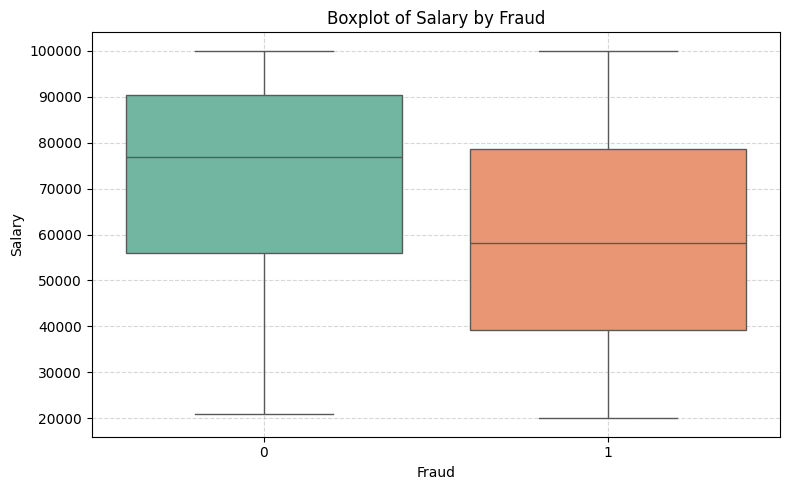

In [25]:
boxplot('Salary')

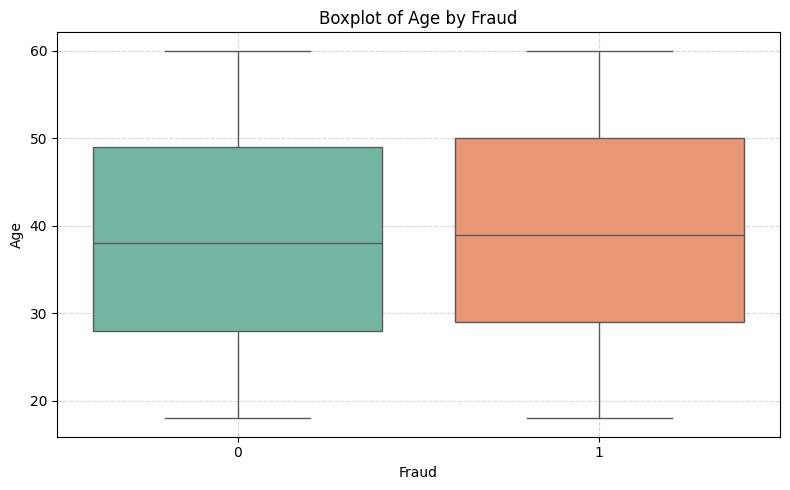

In [26]:
boxplot('Age')

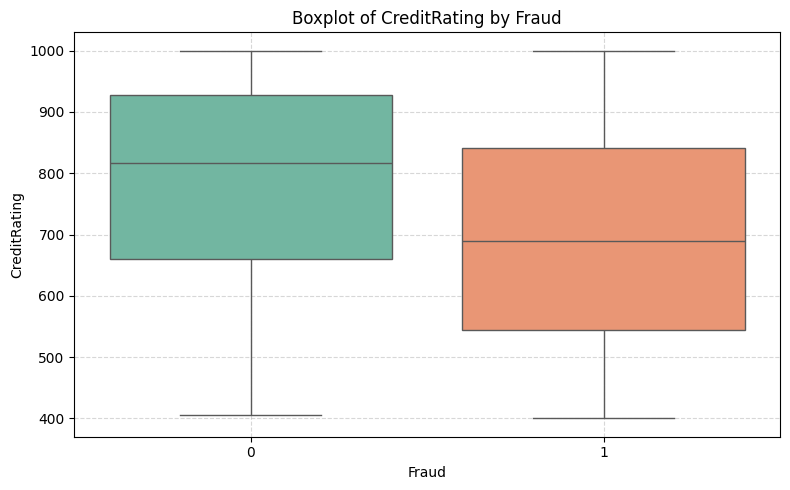

In [27]:
boxplot('CreditRating')

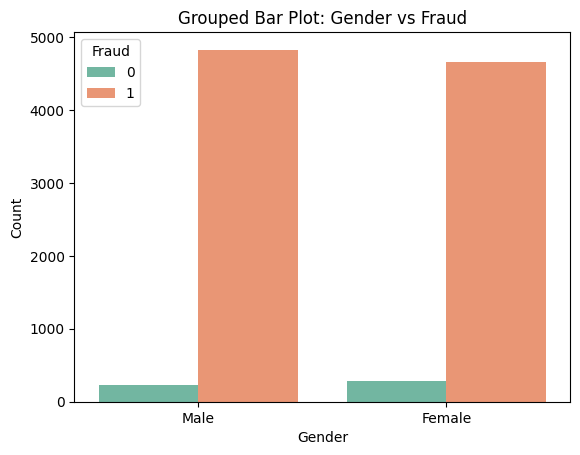

In [28]:
sns.countplot(data=df, x='Gender', hue='Fraud', palette='Set2')
plt.title("Grouped Bar Plot: Gender vs Fraud")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [29]:
def grouped_bar( x='x_axis_col', hue='to_be_grouped'):

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.title(f'Grouped Bar Plot: {x} vs {hue}')
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

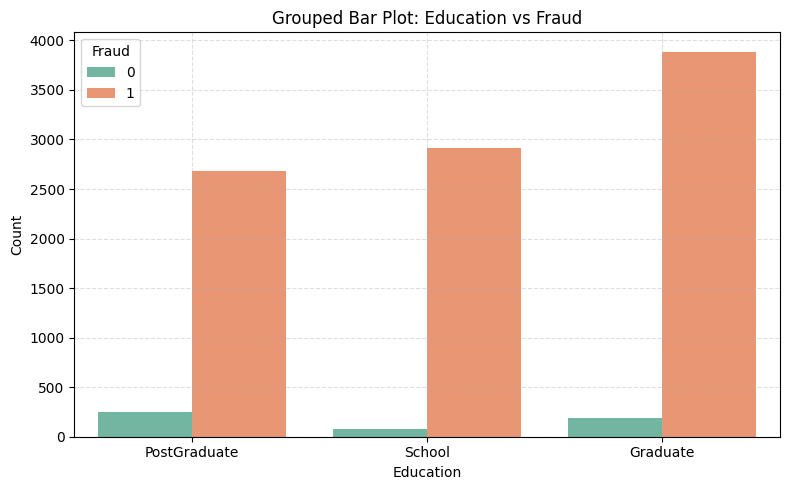

In [30]:
grouped_bar('Education','Fraud')

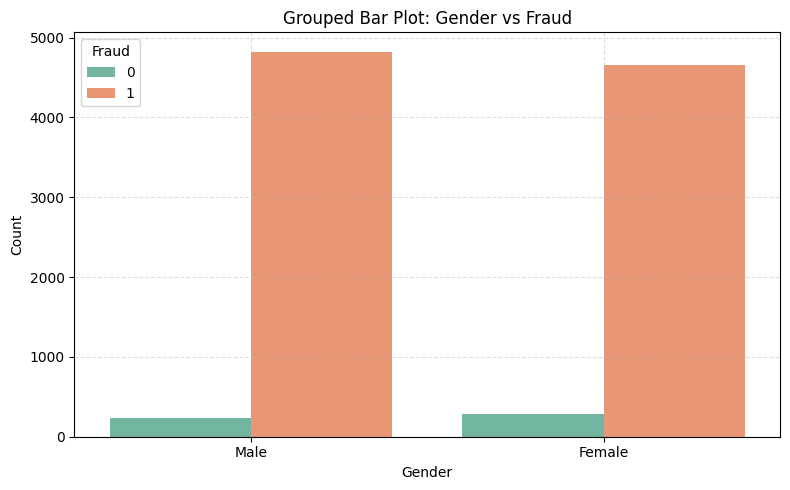

In [31]:
grouped_bar('Gender','Fraud')

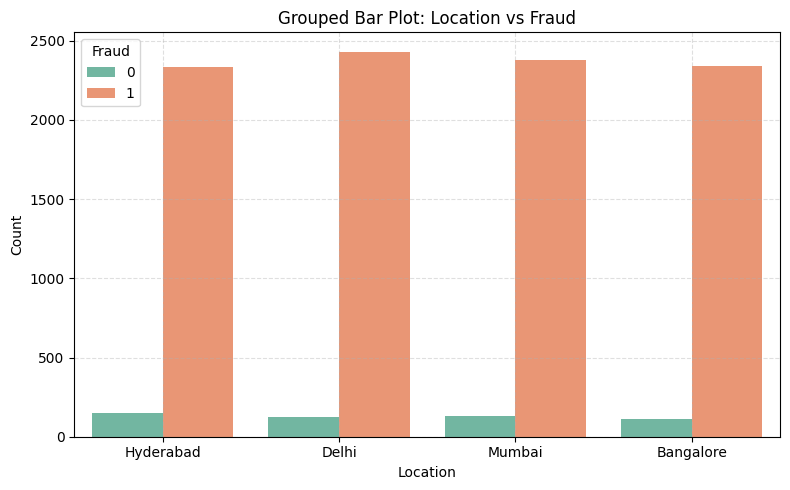

In [32]:
grouped_bar('Location','Fraud')

## Multi-Variate Analysis

In [33]:
df.head()

,Salary,Education,Age,CreditRating,Gender,Location,Fraud
0,35795,PostGraduate,24,515,Male,Hyderabad,1
1,20860,PostGraduate,38,976,Female,Hyderabad,0
2,96820,PostGraduate,55,696,Male,Delhi,1
3,74886,PostGraduate,60,778,Female,Mumbai,1
4,26265,School,45,721,Male,Bangalore,1


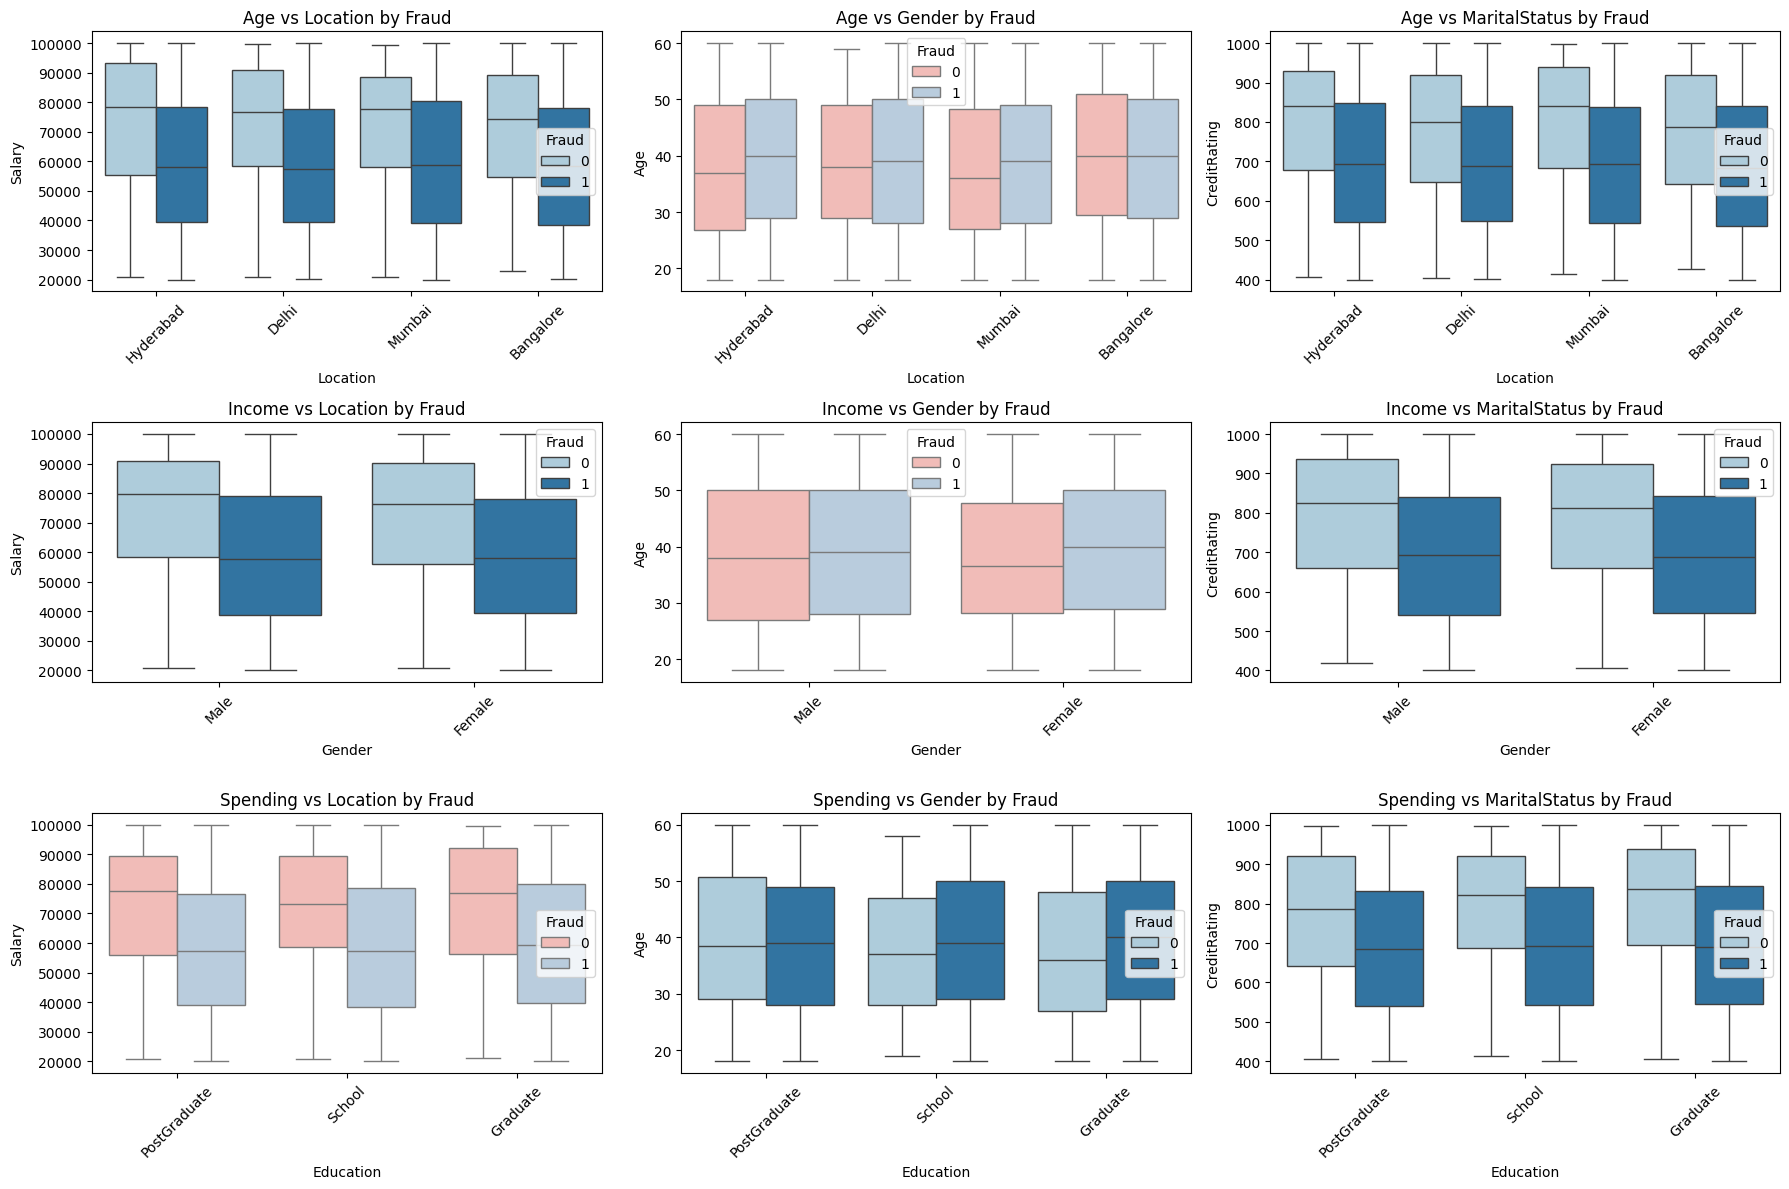

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# 1st plot
sns.boxplot(data=df, x='Location', y='Salary', hue='Fraud', ax=axes[0, 0], palette='Paired')
axes[0, 0].set_title('Age vs Location by Fraud')

# 2nd plot
sns.boxplot(data=df, x='Location', y='Age', hue='Fraud', ax=axes[0, 1], palette='Pastel1')
axes[0, 1].set_title('Age vs Gender by Fraud')

# 3rd plot
sns.boxplot(data=df, x='Location', y='CreditRating', hue='Fraud', ax=axes[0, 2], palette='Paired')
axes[0, 2].set_title('Age vs MaritalStatus by Fraud')

# 4th plot
sns.boxplot(data=df, x='Gender', y='Salary', hue='Fraud', ax=axes[1, 0], palette='Paired')
axes[1, 0].set_title('Income vs Location by Fraud')

# 5th plot
sns.boxplot(data=df, x='Gender', y='Age', hue='Fraud', ax=axes[1, 1], palette='Pastel1')
axes[1, 1].set_title('Income vs Gender by Fraud')

# 6th plot
sns.boxplot(data=df, x='Gender', y='CreditRating', hue='Fraud', ax=axes[1, 2], palette='Paired')
axes[1, 2].set_title('Income vs MaritalStatus by Fraud')

# 7th plot
sns.boxplot(data=df, x='Education', y='Salary', hue='Fraud', ax=axes[2, 0], palette='Pastel1')
axes[2, 0].set_title('Spending vs Location by Fraud')

# 8th plot
sns.boxplot(data=df, x='Education', y='Age', hue='Fraud', ax=axes[2, 1], palette='Paired')
axes[2, 1].set_title('Spending vs Gender by Fraud')

# 9th plot
sns.boxplot(data=df, x='Education', y='CreditRating', hue='Fraud', ax=axes[2, 2], palette='Paired')
axes[2, 2].set_title('Spending vs MaritalStatus by Fraud')

# Layout
for row in axes:
    for ax in row:
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [35]:
df.head()

,Salary,Education,Age,CreditRating,Gender,Location,Fraud
0,35795,PostGraduate,24,515,Male,Hyderabad,1
1,20860,PostGraduate,38,976,Female,Hyderabad,0
2,96820,PostGraduate,55,696,Male,Delhi,1
3,74886,PostGraduate,60,778,Female,Mumbai,1
4,26265,School,45,721,Male,Bangalore,1


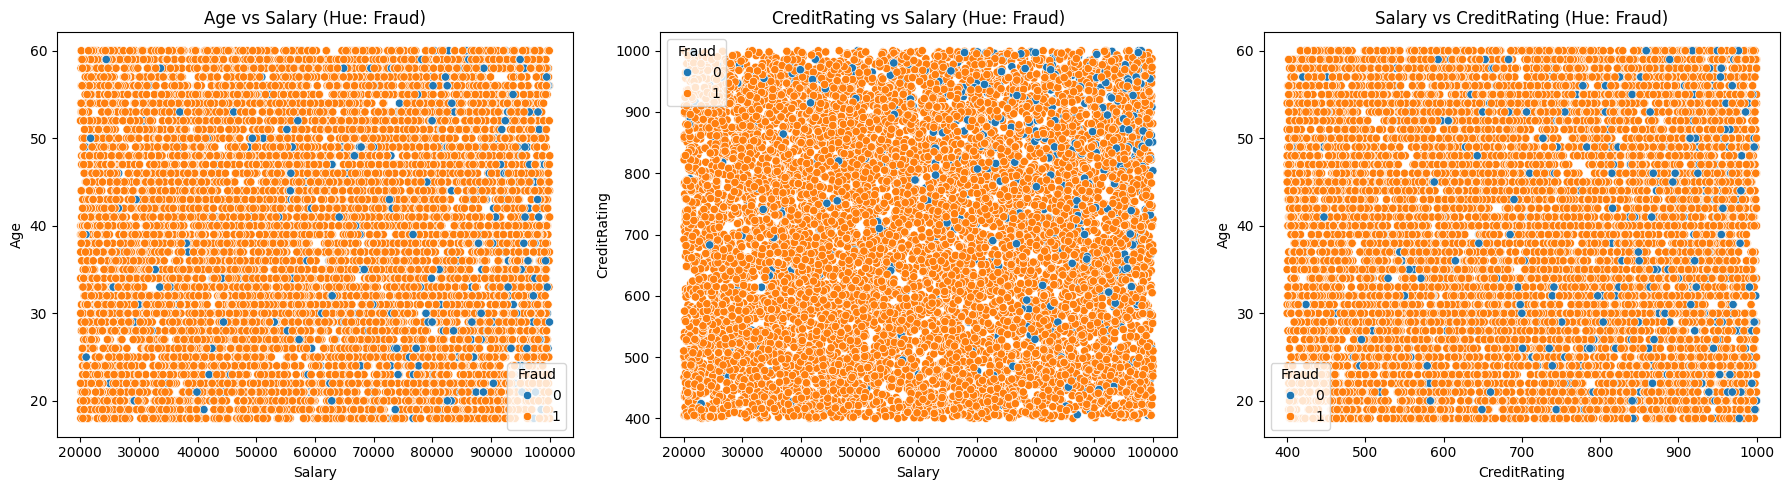

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up 2×3 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Salary vs Age
sns.scatterplot(data=df, x='Salary', y='Age', hue='Fraud', ax=axes[0])
axes[0].set_title('Age vs Salary (Hue: Fraud)')

# Plot 2: Salary vs CreditRating
sns.scatterplot(data=df, x='Salary', y='CreditRating', hue='Fraud', ax=axes[1])
axes[1].set_title('CreditRating vs Salary (Hue: Fraud)')

# Plot 3: CreditRating vs Salary
sns.scatterplot(data=df, x='CreditRating', y='Age', hue='Fraud', ax=axes[2])
axes[2].set_title('Salary vs CreditRating (Hue: Fraud)')


# Optional: Rotate x-ticks and tighten layout
for row in axes:
        ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [37]:
df.head()

,Salary,Education,Age,CreditRating,Gender,Location,Fraud
0,35795,PostGraduate,24,515,Male,Hyderabad,1
1,20860,PostGraduate,38,976,Female,Hyderabad,0
2,96820,PostGraduate,55,696,Male,Delhi,1
3,74886,PostGraduate,60,778,Female,Mumbai,1
4,26265,School,45,721,Male,Bangalore,1


## Corelation Matrix

In [38]:
df1 = df[['Salary','Age','CreditRating','Fraud']]

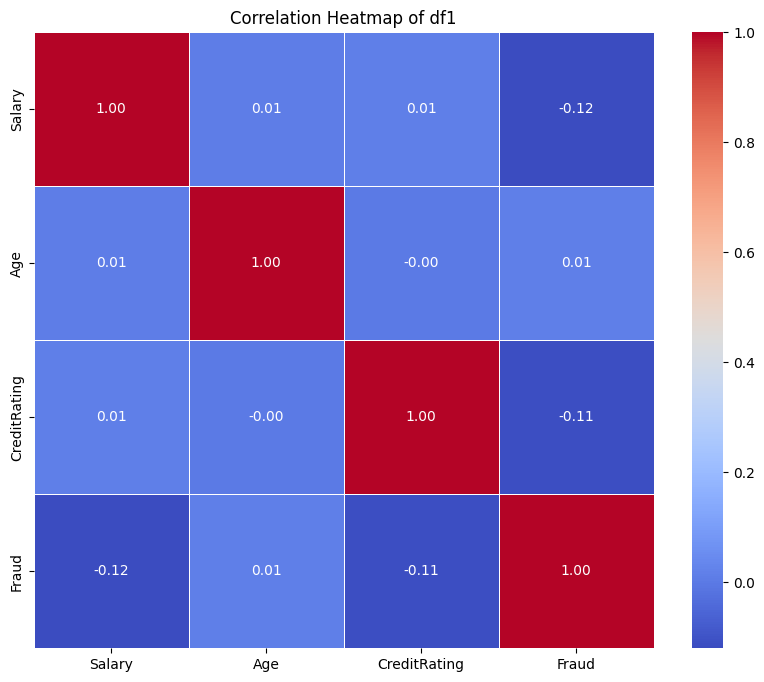

In [39]:
# Calculate correlation matrix
corr = df1.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of df1')
plt.show()

# Infrential Statics

## Key Buisness Questions

In [40]:
# Is there any diffrence between having high salary and getting fraud?
# Check weather there any relation between level of education and getting fraud?
# Is there any diffrence between age and getting fraud?
# Is there any diffrence between CreditRating and getting fraud?
# Are males or females more likely to commit fraud?
# Does people living in diffrent places varies in not geting fraud?

## Is there any diffrence between having high salary and getting fraud?

In [41]:

# Ho = Salary has no effect on Fraud
# Ha = Salary has effect on Fraud


In [42]:
fraud_salary = df[df['Fraud'] == 1]['Salary']
nonfraud_salary = df[df['Fraud'] == 0]['Salary']

ssw.ztest(fraud_salary,nonfraud_salary,value=0,alternative='two-sided')

(np.float64(-12.090446994337384), np.float64(1.1863947844309914e-33))

In [43]:
z_statistic = -12.09
p_value = 0.000000000000000000000000000000000118

In [44]:
# p_value < 0.05
# Null Hypothesis is Rejected
print("Salary has effect on Fraud")

Salary has effect on Fraud


## # Check weather there any relation between level of education and getting fraud?


In [45]:
# Ho = Education has no effect on Fraud
# Ha = Education has effect on Fraud

In [46]:
np.unique(df.Education)

array(['Graduate', 'PostGraduate', 'School'], dtype=object)

In [47]:
from scipy.stats import chi2_contingency
Fraud_x_Edu = pd.crosstab(df['Education'], df['Fraud'])
print(Fraud_x_Edu)
print('----------')
chi2_contingency(Fraud_x_Edu)


Fraud           0     1
Education              
Graduate      189  3887
PostGraduate  254  2684
School         76  2910
----------


Chi2ContingencyResult(statistic=np.float64(116.26854147227488), pvalue=np.float64(5.657271346474042e-26), dof=2, expected_freq=array([[ 211.5444, 3864.4556],
       [ 152.4822, 2785.5178],
       [ 154.9734, 2831.0266]]))

In [48]:
Chi2_statistic = 116.27
p_value = 5.66e-26

In [49]:
# p_value < 0.05
# Null Hypothesis is Rejected
print("Education has effect on Fraud")

Education has effect on Fraud


##  Is there any diffrence between age and getting fraud?

In [50]:
# Ho = Age has no effect on Fraud
# Ha = Age has effect on Fraud

In [51]:
fraud_age = df[df['Fraud'] == 1]['Age']
nonfraud_age = df[df['Fraud'] == 0]['Age']

ssw.ztest(fraud_salary,nonfraud_age,value=0,alternative='two-sided')

(np.float64(58.021102816622864), np.float64(0.0))

In [52]:
z_statistic = 58.02
p_value = 0.0

In [53]:
# p_value < 0.05
# Null Hypothesis is Rejected
print("Age has effect on Fraud")

Age has effect on Fraud


## Is there any diffrence between CreditRating and getting fraud?

In [54]:
# Ho = CreditRating has no effect on Fraud
# Ha = CreditRating has effect on Fraud

In [55]:
fraud_cr = df[df['Fraud'] == 1]['CreditRating']
nonfraud_cr = df[df['Fraud'] == 0]['CreditRating']

ssw.ztest(fraud_cr,nonfraud_cr,value=0,alternative='two-sided')

(np.float64(-11.429236562410287), np.float64(2.987235736004331e-30))

In [56]:
z_statistic = -11.42
p_value     = 2.98e-30

In [57]:
# p_value < 0.05
# Null Hypothesis is Rejected
print("CreditRating has effect on Fraud")

CreditRating has effect on Fraud


## Are males or females more likely to commit fraud?

In [58]:
# Ho = Gender has no effect on Fraud
# Ha = Gender has effect on Fraud

In [59]:
from scipy.stats import chi2_contingency
Gender_x_Edu = pd.crosstab(df['Gender'], df['Fraud'])
print(Gender_x_Edu)
print('----------')
chi2_contingency(Gender_x_Edu)

Fraud     0     1
Gender           
Female  290  4656
Male    229  4825
----------


Chi2ContingencyResult(statistic=np.float64(8.747937715188765), pvalue=np.float64(0.0030995237573584467), dof=1, expected_freq=array([[ 256.6974, 4689.3026],
       [ 262.3026, 4791.6974]]))

In [60]:
Chi2_statistic = 8.74
p_value = 0.003

In [61]:
# p_value < 0.05
# Null Hypothesis is Rejected
print("Gender has effect on Fraud")

Gender has effect on Fraud


## Does people living in diffrent places varies in not geting fraud?

In [62]:
from scipy.stats import chi2_contingency
Location_x_Edu = pd.crosstab(df['Location'], df['Fraud'])
print(Location_x_Edu)
print('----------')
chi2_contingency(Location_x_Edu)

Fraud        0     1
Location            
Bangalore  115  2339
Delhi      124  2431
Hyderabad  148  2335
Mumbai     132  2376
----------


Chi2ContingencyResult(statistic=np.float64(4.877815245486673), pvalue=np.float64(0.18096588713638034), dof=3, expected_freq=array([[ 127.3626, 2326.6374],
       [ 132.6045, 2422.3955],
       [ 128.8677, 2354.1323],
       [ 130.1652, 2377.8348]]))

In [63]:
Chi2_statistic = 4.87
p_value = 0.180

In [64]:
# p_value > 0.05
# Do not reject Null Hypothesis
print("Location has no effect on Fraud")

Location has no effect on Fraud


# Model Training

In [79]:
df.head()

,Salary,Age,CreditRating,Fraud,Edu_PostGraduate,Edu_School,Gender_Male,Loc_Delhi,Loc_Hyderabad,Loc_Mumbai
0,35795,24,515,1,1,0,1,0,1,0
1,20860,38,976,0,1,0,0,0,1,0
2,96820,55,696,1,1,0,1,1,0,0
3,74886,60,778,1,1,0,0,0,0,1
4,26265,45,721,1,0,1,1,0,0,0


In [66]:
edu_dummy = pd.get_dummies(df.Education, drop_first=True,prefix='Edu').astype(int)
df = df.drop('Education', axis=1)
df = pd.concat([df,edu_dummy], axis=1)

In [67]:
gen_dummy = pd.get_dummies(df.Gender, drop_first=True,prefix='Gender').astype(int)
df = df.drop('Gender', axis=1)
df = pd.concat([df,gen_dummy], axis=1)

In [68]:
Loc_dummy = pd.get_dummies(df.Location, drop_first=True,prefix='Loc').astype(int)
df = df.drop('Location', axis=1)
df = pd.concat([df,Loc_dummy], axis=1)

In [80]:
df_model = df[['Salary','Age','CreditRating','Fraud',
               'Edu_PostGraduate','Edu_School','Gender_Male',
               'Loc_Delhi','Loc_Hyderabad','Loc_Mumbai']].copy()

In [81]:
x_train, x_test, y_train, y_test = train_test_split(df_model.drop('Fraud',axis=1), df_model.Fraud, test_size=0.2, random_state=30)
x_train1 = sm.add_constant(x_train,prepend=False)
model_01 = sm.Logit(y_train,x_train1).fit()
print(model_01.summary())

Optimization terminated successfully.
         Current function value: 0.184303
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7990
Method:                           MLE   Df Model:                            9
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                 0.09815
Time:                        02:24:49   Log-Likelihood:                -1474.4
converged:                       True   LL-Null:                       -1634.9
Covariance Type:            nonrobust   LLR p-value:                 9.337e-64
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Salary           -2.492e-05   2.41e-06    -10.363      0.000   -2.96e-05   -2.02e-05
Age        

In [82]:
df_model = df[['Salary','Age','CreditRating','Fraud',
               'Edu_PostGraduate','Edu_School','Gender_Male'
               ]].copy()

In [83]:
x_train, x_test, y_train, y_test = train_test_split(df_model.drop('Fraud',axis=1), df_model.Fraud, test_size=0.2, random_state=30)
x_train1 = sm.add_constant(x_train,prepend=False)
model_02 = sm.Logit(y_train,x_train1).fit()
print(model_02.summary())

Optimization terminated successfully.
         Current function value: 0.184507
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7993
Method:                           MLE   Df Model:                            6
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                 0.09716
Time:                        02:25:04   Log-Likelihood:                -1476.1
converged:                       True   LL-Null:                       -1634.9
Covariance Type:            nonrobust   LLR p-value:                 1.319e-65
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Salary           -2.501e-05   2.41e-06    -10.398      0.000   -2.97e-05   -2.03e-05
Age        

In [84]:
df_model = df[['Salary','CreditRating','Fraud',
               'Edu_PostGraduate','Edu_School','Gender_Male'
               ]].copy()

In [85]:
x_train, x_test, y_train, y_test = train_test_split(df_model.drop('Fraud',axis=1), df_model.Fraud, test_size=0.2, random_state=30)
x_train1 = sm.add_constant(x_train,prepend=False)
model_03 = sm.Logit(y_train,x_train1).fit()
print(model_03.summary())

Optimization terminated successfully.
         Current function value: 0.184653
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7994
Method:                           MLE   Df Model:                            5
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                 0.09644
Time:                        02:25:33   Log-Likelihood:                -1477.2
converged:                       True   LL-Null:                       -1634.9
Covariance Type:            nonrobust   LLR p-value:                 5.017e-66
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Salary           -2.496e-05    2.4e-06    -10.383      0.000   -2.97e-05   -2.02e-05
CreditRatin